## Import Modules

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/AIML/facial_expressions/input/dataset.zip", 'r')
zip_ref.extractall("/content/drive/MyDrive/AIML/facial_expressions/")
zip_ref.close()


## Load the Dataset

In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/AIML/facial_expressions/train/'
TEST_DIR = '/content/drive/MyDrive/AIML/facial_expressions/test/'

In [ ]:
def load_dataset(directory):
    image_paths = []
    labels = []

    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)

        print(label, "Completed")

    return image_paths, labels

In [ ]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,/content/drive/MyDrive/AIML/facial_expressions...,neutral
1,/content/drive/MyDrive/AIML/facial_expressions...,sad
2,/content/drive/MyDrive/AIML/facial_expressions...,neutral
3,/content/drive/MyDrive/AIML/facial_expressions...,fear
4,/content/drive/MyDrive/AIML/facial_expressions...,fear


In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,/content/drive/MyDrive/AIML/facial_expressions...,angry
1,/content/drive/MyDrive/AIML/facial_expressions...,angry
2,/content/drive/MyDrive/AIML/facial_expressions...,angry
3,/content/drive/MyDrive/AIML/facial_expressions...,angry
4,/content/drive/MyDrive/AIML/facial_expressions...,angry


## Exploratory Data Analysis

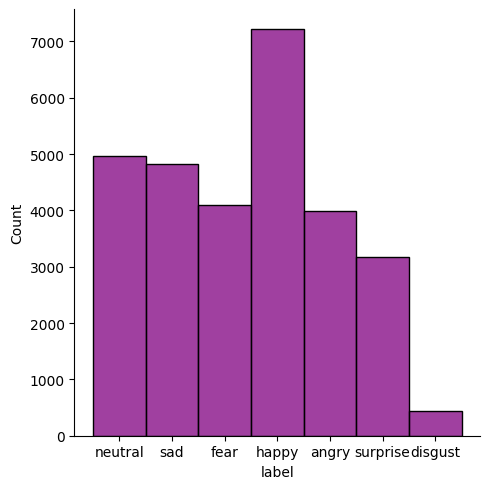

In [ ]:
sns.displot(train['label'],color='purple')

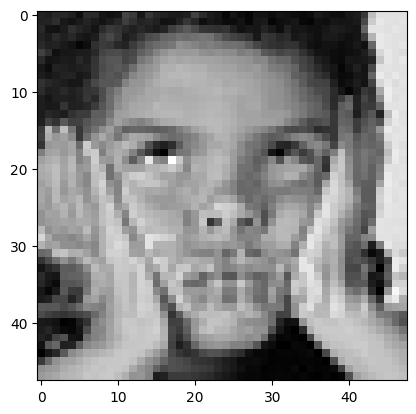

In [ ]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

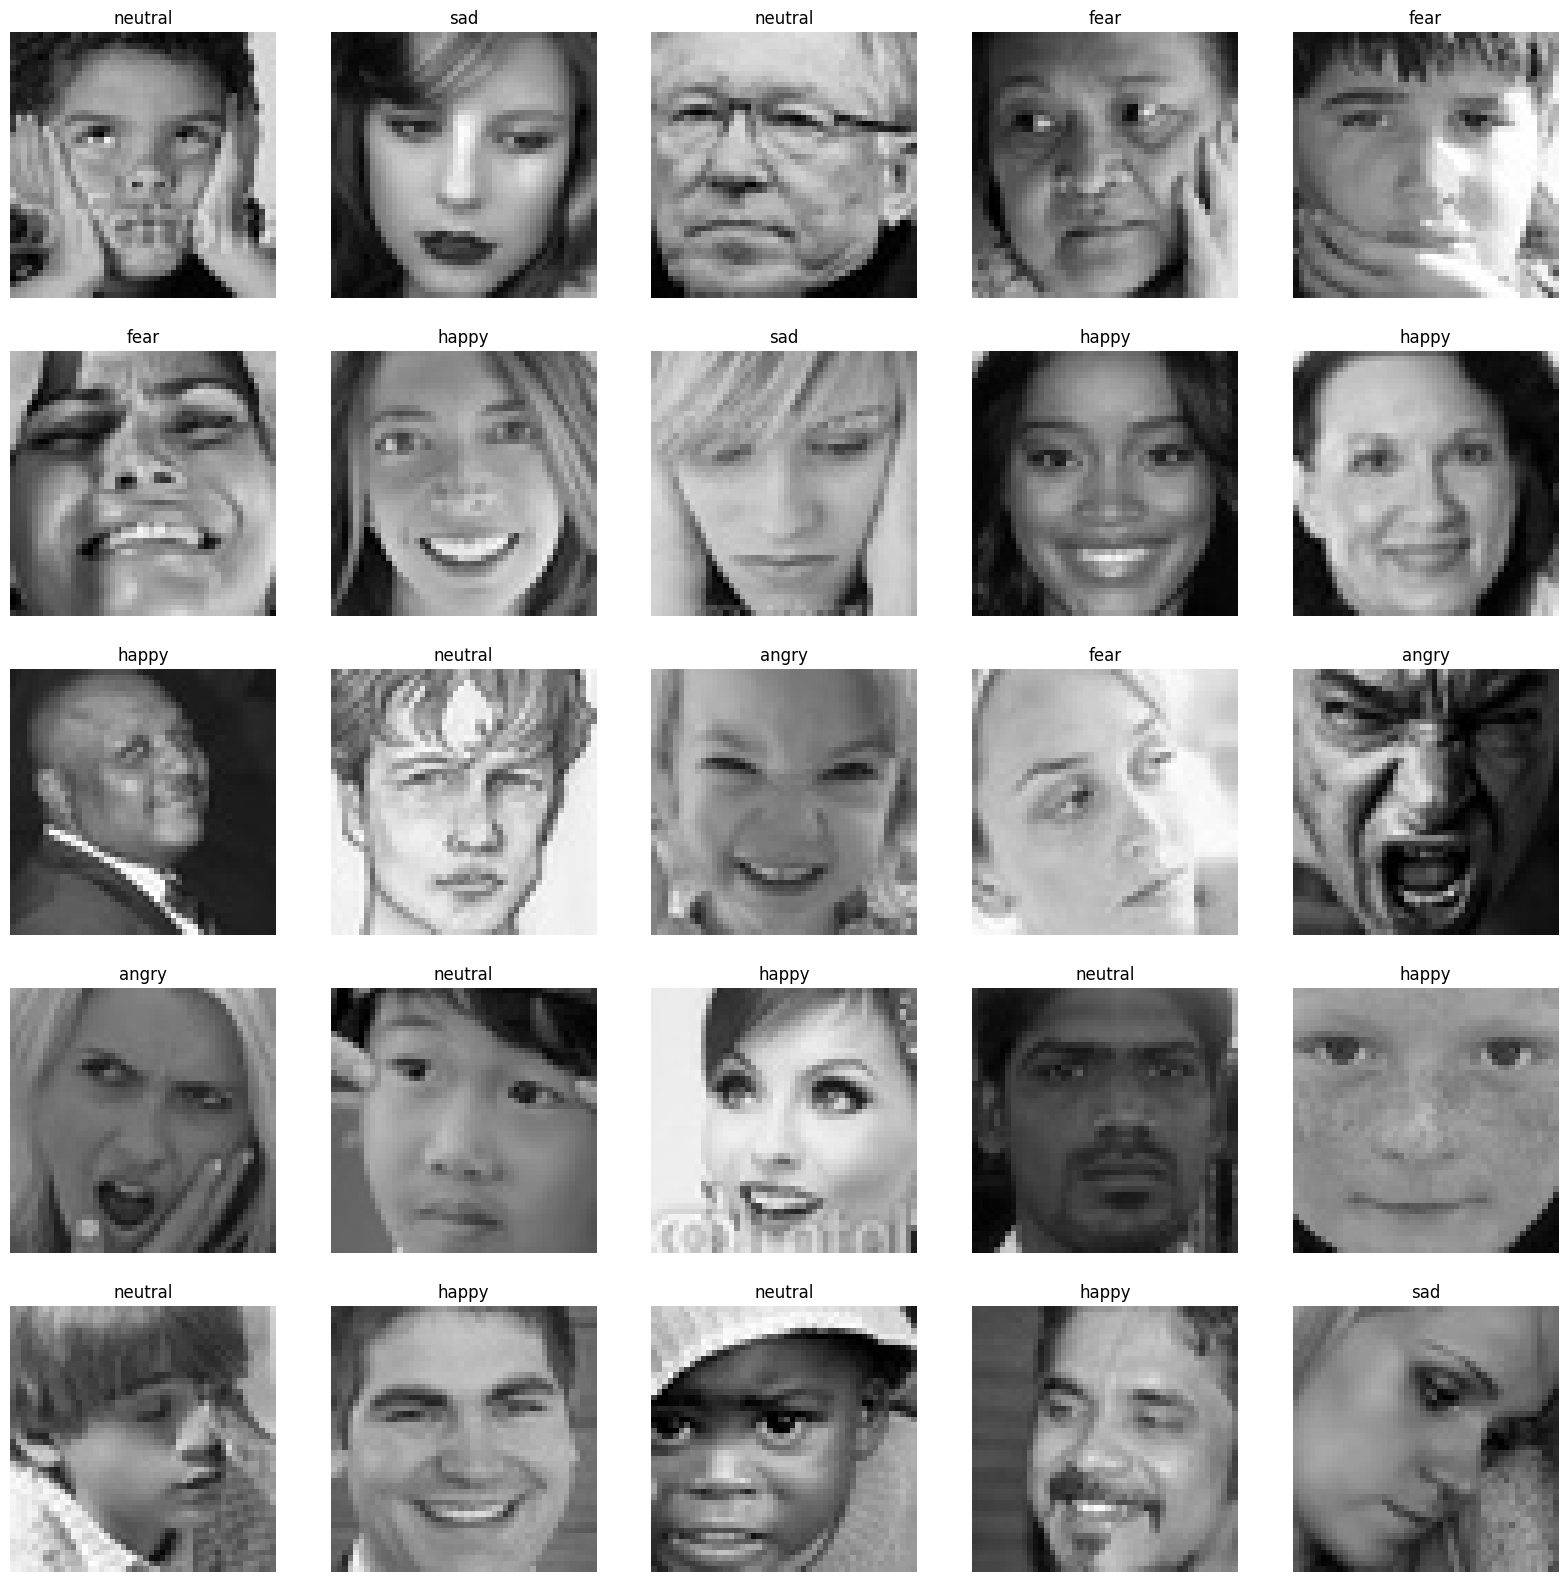

In [ ]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

## Feature Extraction

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [ ]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [ ]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [ ]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
# config
input_shape = (48, 48, 1)
output_class = 7

## Model Creation

In [ ]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=7, validation_data=(x_test, y_test))

Epoch 1/7
225/225 [==============================] - 1760s 8s/step - loss: 1.8199 - accuracy: 0.2474 - val_loss: 1.8011 - val_accuracy: 0.2519
Epoch 2/7
225/225 [==============================] - 1781s 8s/step - loss: 1.7608 - accuracy: 0.2716 - val_loss: 1.6693 - val_accuracy: 0.3268
Epoch 3/7
225/225 [==============================] - 1775s 8s/step - loss: 1.6424 - accuracy: 0.3401 - val_loss: 1.4971 - val_accuracy: 0.4196
Epoch 4/7
225/225 [==============================] - 1764s 8s/step - loss: 1.5240 - accuracy: 0.4074 - val_loss: 1.4162 - val_accuracy: 0.4643
Epoch 5/7
225/225 [==============================] - 1793s 8s/step - loss: 1.4404 - accuracy: 0.4455 - val_loss: 1.3373 - val_accuracy: 0.4889
Epoch 6/7
225/225 [==============================] - 1744s 8s/step - loss: 1.3954 - accuracy: 0.4606 - val_loss: 1.2921 - val_accuracy: 0.5015
Epoch 7/7
225/225 [==============================] - 1773s 8s/step - loss: 1.3617 - accuracy: 0.4805 - val_loss: 1.2529 - val_accuracy: 0.5198

## Plot the Results

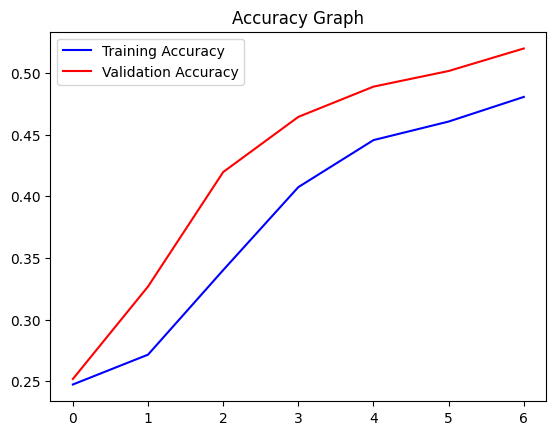

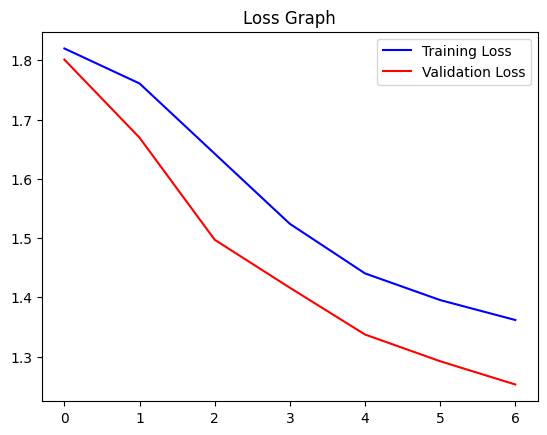

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

## Test with Image Data

Original Output: happy
1/1 [==============================] - 0s 361ms/step
Predicted Output: happy


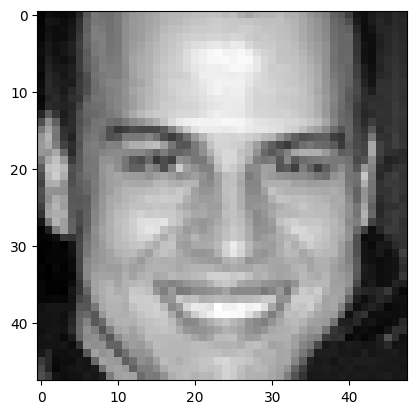

In [ ]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: neutral
1/1 [==============================] - 0s 55ms/step
Predicted Output: neutral


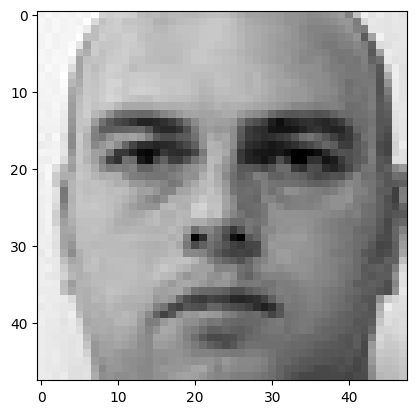

In [ ]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: sad
1/1 [==============================] - 0s 35ms/step
Predicted Output: sad


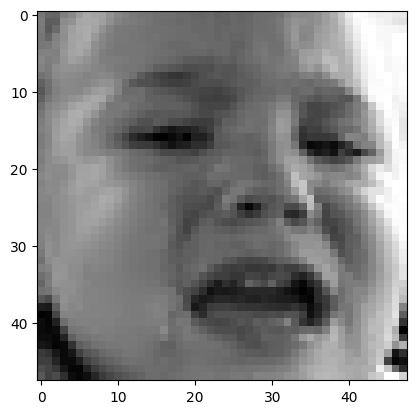

In [ ]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');